In [1]:
# FNG ITER Neutron Streaming Benchmark postprocessing

In [2]:
# import modules
import openmc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

sns.set_style("ticks")

In [3]:
# parameters & functions
# sns.set_style('darkgrid')
# dect_vol =  # cm3 - detector cells volume

def read_measured_data(data_filename, sheet_name):
    df = pd.read_excel(data_filename, sheet_name=sheet_name)
    df[['y(cm)', 'E', 'Error on E']] = df['y(cm)      E      Error on E'].str.split('     ', 2, expand=True)
    df = df.iloc[:, 1:]
    try:
        df[:] = df[:].astype(float)
        df['Error on E'] = df['Error on E']*df['E']/100
    except (ValueError, TypeError):
        pass

    return df

def read_measured_data_wpos(data_filename, sheet_name):
    df = pd.read_excel(data_filename, sheet_name=sheet_name)
    df[['Position/y(cm)', 'E', 'Error on E']] = df['Position/y(cm)     E     Error on E'].str.split('    ', 2, expand=True)
    df = df.iloc[:, 1:]
    for column in df:
        try:
            df[column] = df[column].astype(float)
        except (ValueError, TypeError):
            pass
    
    try:
        df['Error on E'] = df['Error on E']*df['E']/100
    except (ValueError, TypeError):
        pass
    
    return df

def read_computed_data(data_filename, sheet_name):
    df = pd.read_excel(data_filename, sheet_name=sheet_name)
    df[['y(cm)', 'C EFF-3', 'EFF-3 err', 'C FENDL-1', 'FENDL-1 err', 'C FENDL-2', 'FENDL-2 err', 'C/E EFF-3', 'C/E FEN-1', 'C/E FEN-2']] = df['y(cm)     C EFF-3     EFF-3 err     C FENDL-1     FENDL-1 err     C FENDL-2     FENDL-2 err     C/E EFF-3     C/E FEN-1     C/E FEN-2'].str.split('     ', 10, expand=True)
    df = df.iloc[:, 1:]

    for column in df:
        try:
            df[column] = df[column].astype(float)
        except (ValueError, TypeError):
            pass

    try:
        df['EFF-3 err'] = df['EFF-3 err']*df['C EFF-3']/100
        df['FENDL-1 err'] = df['FENDL-1 err']*df['C FENDL-1']/100
        df['FENDL-2 err'] = df['FENDL-2 err']*df['C FENDL-2']/100
    except (ValueError, TypeError):
        pass

    return df

def read_computed_data2(data_filename, sheet_name):
    df = pd.read_excel(data_filename, sheet_name=sheet_name)
    df[['y(cm)', 'C EFF-3', 'EFF-3 err', 'C FENDL-1', 'FENDL-1 err', 'C/E EFF-3', 'C/E FEN-1']] = df['y(cm)     C EFF-3     EFF-3 err     C FENDL-1     FENDL-1 err     C/E EFF-3     C/E FEN-1'].str.split('     ', 7, expand=True)
    df = df.iloc[:, 1:]

    for column in df:
        try:
            df[column] = df[column].astype(float)
        except (ValueError, TypeError):
            pass
    
    try:
        df['EFF-3 err'] = df['EFF-3 err']*df['C EFF-3']/100
        df['FENDL-1 err'] = df['FENDL-1 err']*df['C FENDL-1']/100
    except (ValueError, TypeError):
        pass

    return df

def read_computed_data_wpos(data_filename, sheet_name):
    df = pd.read_excel(data_filename, sheet_name=sheet_name)
    df[['Position/y(cm)', 'C EFF-3', 'EFF-3 err', 'C FENDL-1', 'FENDL-1 err', 'C FENDL-2', 'FENDL-2 err', 'C/E EFF-3', 'C/E FEN-1', 'C/E FEN-2']] = df['Position/y(cm)     C EFF-3     EFF-3 err     C FENDL-1     FENDL-1 err     C FENDL-2     FENDL-2 err     C/E EFF-3     C/E FEN-1     C/E FEN-2'].str.split('     ', 10, expand=True)
    df = df.iloc[:, 1:]
    for column in df:
        try:
            df[column] = df[column].astype(float)
        except (ValueError, TypeError):
            pass
    
    try:
        df['EFF-3 err'] = df['EFF-3 err']*df['C EFF-3']/100
        df['FENDL-1 err'] = df['FENDL-1 err']*df['C FENDL-1']/100
        df['FENDL-2 err'] = df['FENDL-2 err']*df['C FENDL-2']/100
    except (ValueError, TypeError):
        pass

    return df

def read_computed_data_wpos2(data_filename, sheet_name):
    df = pd.read_excel(data_filename, sheet_name=sheet_name)
    df[['Position/y(cm)', 'C EFF-3', 'EFF-3 err', 'C FENDL-1', 'FENDL-1 err', 'C/E EFF-3', 'C/E FEN-1']] = df['Position/y(cm)     C EFF-3     EFF-3 err     C FENDL-1     FENDL-1 err     C/E EFF-3     C/E FEN-1'].str.split('     ', 7, expand=True)
    df = df.iloc[:, 1:]
    
    for column in df:
        try:
            df[column] = df[column].astype(float)
        except (ValueError, TypeError):
            pass
    
    try:
        df['EFF-3 err'] = df['EFF-3 err']*df['C EFF-3']/100
        df['FENDL-1 err'] = df['FENDL-1 err']*df['C FENDL-1']/100
    except (ValueError, TypeError):
        pass

    return df

In [4]:
# MEASURED REACTION RATE RESULTS (from the "fnsstr-a.htm" file in SINBAD)

reactions = [r'Nb93n2n', r'Al27na', r'Ni58np', r'Au197ng']

#  Table 5: Experimental results (E) of reaction rates measurements along the central mock-up axis, 
# with the neutron source on axis with respect to the channel/box structure (IN-AXIS) (1.0E-24/source neutron)
tab5_measured_nb = read_measured_data(r'tab5_reaction_rates.xlsx', reactions[0])
tab5_measured_al = read_measured_data(r'tab5_reaction_rates.xlsx', reactions[1])
tab5_measured_ni = read_measured_data(r'tab5_reaction_rates.xlsx', reactions[2])
tab5_measured_au = read_measured_data(r'tab5_reaction_rates.xlsx', reactions[3])
# Table 6: Experimental results (E) of reaction rates measurements inside the cavity, 
# with the neutron source on axis with respect to the channel/cavity structure (IN-AXIS)(1.0E-24/source neutron)
tab6_measured_nb = read_measured_data_wpos(r'tab6_reaction_rates.xlsx', reactions[0])
tab6_measured_al = read_measured_data_wpos(r'tab6_reaction_rates.xlsx', reactions[1])
tab6_measured_ni = read_measured_data_wpos(r'tab6_reaction_rates.xlsx', reactions[2])
tab6_measured_au = read_measured_data_wpos(r'tab6_reaction_rates.xlsx', reactions[3])
# Table 7: Experimental results (E) of reaction rates measurements in the channel and in the cavity, 
# with the neutron source shifted with respect to the channel/cavity axis (OFF-AXIS) (1.0E-24/source neutron)
tab7_measured_nb = read_measured_data_wpos(r'tab7_reaction_rates.xlsx', reactions[0])
tab7_measured_al = read_measured_data_wpos(r'tab7_reaction_rates.xlsx', reactions[1])
tab7_measured_ni = read_measured_data_wpos(r'tab7_reaction_rates.xlsx', reactions[2])
tab7_measured_au = read_measured_data_wpos(r'tab7_reaction_rates.xlsx', reactions[3])

In [5]:
tab5_measured_nb['y(cm)']

0      0.25
1     12.95
2     25.95
3     38.65
4     43.82
5     46.35
6     53.30
7     60.05
8     66.90
9     73.90
10    80.60
11    87.25
12    91.65
Name: y(cm), dtype: float64

In [6]:
# MCNP COMPUTED REACTION RATE RESULTS (from the "fnsstr-a.htm" file in SINBAD)
# Tab. 9 : Calculated reaction rates (C) along the central mock-up axis  obtained using  MCNP
# with FENDL-1, FENDL-2 and EFF-3 nuclear data libraries (1.0E-24/source neutron). 
# Errors represent MCNP calculation statistical uncertainties.  
# Comparison between calculated and measured values (C/E ratios) (ON-AXIS) 
tab9_computed_nb = read_computed_data(r'tab9_reaction_rates.xlsx', reactions[0])
tab9_computed_al = read_computed_data(r'tab9_reaction_rates.xlsx', reactions[1])
tab9_computed_ni = read_computed_data(r'tab9_reaction_rates.xlsx', reactions[2])
tab9_computed_au = read_computed_data2(r'tab9_reaction_rates.xlsx', reactions[3])
# Tab. 10 : Calculated reaction rates (C) in the cavity obtained using MCNP
# with FENDL-1/FENDL-2 and EFF-3 nuclear data libraries (1.0E-24/source neutron). 
# Errors represent the MCNP calculation statistical uncertainties. 
# Comparison between calculated and measured values (C/E ratios)
tab10_computed_nb = read_computed_data_wpos(r'tab10_reaction_rates.xlsx', reactions[0])
tab10_computed_al = read_computed_data_wpos(r'tab10_reaction_rates.xlsx', reactions[1])
tab10_computed_ni = read_computed_data_wpos(r'tab10_reaction_rates.xlsx', reactions[2])
tab10_computed_au = read_computed_data_wpos2(r'tab10_reaction_rates.xlsx', reactions[3])
# Tab. 11 : Calculated reaction rates (C) in the channel and in the cavity obtained using MCNP
# with FENDL-1/FENDL-2 and EFF-3 nuclear data libraries (1.0E-24/source neutron). 
# Errors represent the MCNP calculation statistical uncertainties. 
# Comparison between calculated and measured values (C/E ratios) (OFF-AXIS)
tab11_computed_nb = read_computed_data_wpos(r'tab11_reaction_rates.xlsx', reactions[0])
tab11_computed_al = read_computed_data_wpos(r'tab11_reaction_rates.xlsx', reactions[1])
tab11_computed_ni = read_computed_data_wpos(r'tab11_reaction_rates.xlsx', reactions[2])
tab11_computed_au = read_computed_data_wpos2(r'tab11_reaction_rates.xlsx', reactions[3])

In [7]:
# read results from OpenMC simulations

# ON-AXIS results
omc_sp_nb = openmc.StatePoint('statepoint_nb100m.100.h5')
omc_sp_al = openmc.StatePoint('statepoint_al10b.100.h5')
omc_sp_ni = openmc.StatePoint('statepoint_ni10b.100.h5')
omc_sp_au = openmc.StatePoint('statepoint_au10b.100.h5')

detector_reaction_rate_nb = omc_sp_nb.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_al = omc_sp_al.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_ni = omc_sp_ni.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_au = omc_sp_au.get_tally(name='detector_reaction_rate').get_pandas_dataframe()

detector_reaction_rate_nb = omc_sp_nb.get_tally(name='detector_reaction_rate').get_pandas_dataframe()

omc_nb = detector_reaction_rate_nb.loc[(detector_reaction_rate_nb['nuclide'] == 'Nb93') & (detector_reaction_rate_nb['score'] == '(n,2n)')]
omc_al = detector_reaction_rate_al.loc[(detector_reaction_rate_al['nuclide'] == 'Al27') & (detector_reaction_rate_al['score'] == '(n,a)')]
omc_ni = detector_reaction_rate_ni.loc[(detector_reaction_rate_ni['nuclide'] == 'Ni58') & (detector_reaction_rate_ni['score'] == '(n,p)')]
omc_au = detector_reaction_rate_au.loc[(detector_reaction_rate_au['nuclide'] == 'Au197') & (detector_reaction_rate_au['score'] == '(n,gamma)')]


In [8]:
# OFF-AXIS results
omc_sp_nb_oa = openmc.StatePoint('statepoint_nb10b_offaxis.100.h5')
omc_sp_al_oa = openmc.StatePoint('statepoint_al10b_offaxis.100.h5')
omc_sp_ni_oa = openmc.StatePoint('statepoint_ni10b_offaxis.100.h5')
omc_sp_au_oa = openmc.StatePoint('statepoint_au10b_offaxis.100.h5')

detector_reaction_rate_nb_oa = omc_sp_nb_oa.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_al_oa = omc_sp_al_oa.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_ni_oa = omc_sp_ni_oa.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_au_oa = omc_sp_au_oa.get_tally(name='detector_reaction_rate').get_pandas_dataframe()

omc_nb_oa = detector_reaction_rate_nb_oa.loc[(detector_reaction_rate_nb_oa['nuclide'] == 'Nb93') & (detector_reaction_rate_nb_oa['score'] == '(n,2n)')]
omc_al_oa = detector_reaction_rate_al_oa.loc[(detector_reaction_rate_al_oa['nuclide'] == 'Al27') & (detector_reaction_rate_al_oa['score'] == '(n,a)')]
omc_ni_oa = detector_reaction_rate_ni_oa.loc[(detector_reaction_rate_ni_oa['nuclide'] == 'Ni58') & (detector_reaction_rate_ni_oa['score'] == '(n,p)')]
omc_au_oa = detector_reaction_rate_au_oa.loc[(detector_reaction_rate_au_oa['nuclide'] == 'Au197') & (detector_reaction_rate_au_oa['score'] == '(n,gamma)')]

In [9]:
# selecting cell for different tables:
table9_cell_x = [135, 158, 181, 204, 602, 239, 262, 285, 308, 331, 363, 386, 398]
table9_cell_au = [602, 239, 262, 285, 308, 331, 363, 386]
table10_cell_x = table10_cell_au = [605, 606, 607, 608, 609, 610, 611, 612, 602, 603, 604]
table11_cell_x = [135, 158, 181, 204, 605, 606, 607, 608, 609, 610, 611, 612, 602, 603, 604]
table11_cell_au = [605, 606, 607, 608, 609, 610, 611, 612, 602, 603, 604]

#
omc_tab9_nb = omc_nb[omc_nb['cell'].isin(table9_cell_x)]
omc_tab10_nb = omc_nb[omc_nb['cell'].isin(table10_cell_x)]
omc_tab11_nb = omc_nb_oa[omc_nb_oa['cell'].isin(table11_cell_x)]
#
omc_tab9_al = omc_al[omc_al['cell'].isin(table9_cell_x)]
omc_tab10_al = omc_al[omc_al['cell'].isin(table10_cell_x)]
omc_tab11_al = omc_al_oa[omc_al_oa['cell'].isin(table11_cell_x)]
#
omc_tab9_ni = omc_ni[omc_ni['cell'].isin(table9_cell_x)]
omc_tab10_ni = omc_ni[omc_ni['cell'].isin(table10_cell_x)]
omc_tab11_ni = omc_ni_oa[omc_ni_oa['cell'].isin(table11_cell_x)]
#
omc_tab9_au = omc_au[omc_au['cell'].isin(table9_cell_au)]
omc_tab10_au = omc_au[omc_au['cell'].isin(table10_cell_au)]
omc_tab11_au = omc_au_oa[omc_au_oa['cell'].isin(table11_cell_au)]


In [10]:
# reaction rate multiplication coefficients for reaction/1e24 atoms
# for instance: 
# nb atom density = 0.1204 atoms / b-cm
# nb act foil volume = 0.2545 or 0.509 or 0.7635 e24 b*cm, depending on the position in the mockup
# coeff for nb in low depts: 1 / (0.1204*0.2545) = 32.6352
# also, ni58 has 68.27% abundance

# actual density
tab9_nb_coeff = np.array([1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3]) / 0.05555
tab9_al_coeff = np.array([1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3]) / 0.06026
tab9_ni_coeff = np.array([1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3]) / 0.06222
tab9_au_coeff = np.array([1/0.2545, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3]) / 0.05901 / 0.05

tab10_nb_coeff = np.ones(11) / 0.2545 /  0.05555
tab10_al_coeff = np.ones(11) / 0.2545 / 0.06026
tab10_ni_coeff = np.ones(11) / 0.2545 / 0.06222
tab10_au_coeff = np.ones(11) / 0.2545 / 0.05901 / 0.05

tab11_nb_coeff = np.array([1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545]) / 0.05555
tab11_al_coeff = np.array([1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545]) / 0.06026
tab11_ni_coeff = np.array([1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545]) / 0.06222
tab11_au_coeff = np.array([1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545]) / 0.05901 / 0.05

In [11]:
# error propagation

np.arange(len(tab5_measured_nb)), tab5_measured_nb['E'], tab5_measured_nb['Error on E']
np.arange(len(tab9_computed_nb)), tab9_computed_nb['C FENDL-1'], tab9_computed_nb['FENDL-1 err']

mcnp_ce_ni = np.array(tab9_computed_ni['C FENDL-1']) / np.array(tab5_measured_ni['E'])
mcnp_ce_err_ni = mcnp_ce_ni * np.sqrt((np.array(tab5_measured_ni['Error on E'])/np.array(tab5_measured_ni['E']))**2 + (np.array(tab9_computed_ni['FENDL-1 err'])/np.array(tab9_computed_ni['C FENDL-1']))**2)
omc_ce_ni = np.array(omc_tab9_ni['mean']) * tab9_ni_coeff / np.array(tab5_measured_ni['E'])
omc_ce_err_ni = omc_ce_ni * np.sqrt((np.array(tab5_measured_ni['Error on E'])/np.array(tab5_measured_ni['E']))**2 + (np.array(omc_tab9_ni['std. dev.'])/np.array(omc_tab9_ni['mean']))**2)


In [12]:
# for irdff
omc_sp_nb_new = openmc.StatePoint('statepoint_nb100m.100.h5')

detector_reaction_rate_nb_new = omc_sp_nb_new.get_tally(name='nb93_irdff_rr').get_pandas_dataframe()
omc_nb_new = detector_reaction_rate_nb_new.loc[(detector_reaction_rate_nb_new['particle'] == 'neutron')]
#
omc_tab9_nb_new = omc_nb_new[omc_nb_new['cell'].isin(table9_cell_x)]
omc_tab10_nb_new = omc_nb_new[omc_nb_new['cell'].isin(table10_cell_x)]
omc_tab11_nb_new = omc_nb_new[omc_nb_new['cell'].isin(table11_cell_x)]

# actual density
tab9_nb_coeff_new = np.array([1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/2, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3, 1/0.2545/3])
tab10_nb_coeff_new = np.ones(11) / 0.2545
tab11_nb_coeff_new = np.ones(15) / 0.2545

Text(0, 0.5, 'C/E')

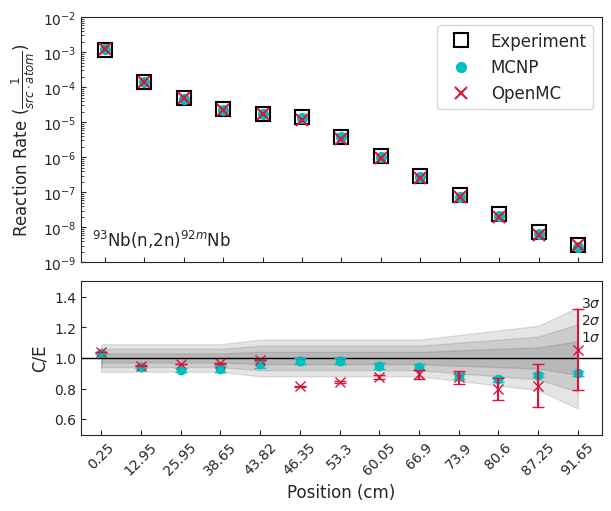

In [13]:
my_xticks = np.arange(len(tab5_measured_nb))
my_xlabels = tab5_measured_nb['y(cm)']
exp_nb_mean = np.array(tab5_measured_nb['E'])
exp_nb_stddev = np.array(tab5_measured_nb['Error on E'])
mcnp_nb_mean = np.array(tab9_computed_nb['C FENDL-1'])
mcnp_nb_stddev = np.array(tab9_computed_nb['FENDL-1 err'])
mcnp_nb_rstddev = mcnp_nb_stddev / mcnp_nb_mean
mcnp_nb_ce = np.array(tab9_computed_nb['C/E FEN-1'])
omc_nb_mean = np.array(omc_tab9_nb_new['mean'])*tab9_nb_coeff_new
omc_nb_stddev = np.array(omc_tab9_nb_new['std. dev.'])*tab9_nb_coeff_new
omc_nb_rstddev = omc_nb_stddev / omc_nb_mean
omc_nb_ce = omc_nb_mean / exp_nb_mean
exp_nb_rstddev = np.array(tab5_measured_nb['Error on E']/tab5_measured_nb['E'])


# Nb93(n,2n)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
ax1.plot(my_xticks, exp_nb_mean, marker='s', ms=10, ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')
ax1.plot(my_xticks, mcnp_nb_mean, marker='o', ms=7, ls='none', alpha=1, color='c', label='MCNP')
ax1.plot(my_xticks, omc_nb_mean, marker='x', ms=8, mew=1.5, ls='none', color='crimson', zorder=4, label='OpenMC')
ax1.set_yscale('log')
ax1.set_ylim([1e-9, 1e-2])
ax1.set_xticks(my_xticks)
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='both', which='both', direction='in')
ax1.legend(frameon=True, fontsize=12)
# ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel(r'Reaction Rate $(\frac{1}{src \cdot atom})$', fontsize=12)
# ax1.spines[['right', 'top']].set_visible(False)
ax1.annotate('$^{93}$Nb(n,2n)$^{92m}$Nb', [0.02, 0.05], xycoords='axes fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=12)
#
ax2.fill_between(my_xticks, 1 - exp_nb_rstddev, 1 + exp_nb_rstddev, color='k', alpha=.1)
ax2.fill_between(my_xticks, 1 - 2*exp_nb_rstddev, 1 + 2*exp_nb_rstddev, color='k', alpha=.1)
ax2.fill_between(my_xticks, 1 - 3*exp_nb_rstddev, 1 + 3*exp_nb_rstddev, color='k', alpha=.1)
ax2.annotate('$1\sigma$', [12.07, 1 + 1*exp_nb_rstddev[-1]], fontsize=10, clip_on=False)
ax2.annotate('$2\sigma$', [12.07, 1 + 2*exp_nb_rstddev[-1]], fontsize=10, clip_on=False)
ax2.annotate('$3\sigma$', [12.07, 1 + 3*exp_nb_rstddev[-1]], fontsize=10, clip_on=False)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='-', linewidth=1, label='_nolegend_')
ax2.errorbar(my_xticks, mcnp_nb_ce, mcnp_nb_rstddev*mcnp_nb_ce, marker='o', ms=6, capsize=4, barsabove=True, color='c', ls='none', label='_mcnp')
ax2.errorbar(my_xticks, omc_nb_ce, omc_nb_rstddev*omc_nb_ce, marker='x', ms=7, capsize=4, barsabove=True, color='crimson', ls='none', label='_openmc')
ax2.set_xlim([-0.5, 12.6])
ax2.set_ylim([0.5, 1.5])
ax2.set_xticks(np.arange(len(tab9_computed_nb)))
ax2.set_xticklabels(tab9_computed_nb['y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.set_xlabel('Position (cm)', fontsize=12)
ax2.set_ylabel('C/E', fontsize=12)
# plt.tight_layout()
# plt.savefig("nb_tab9.png", format="png")



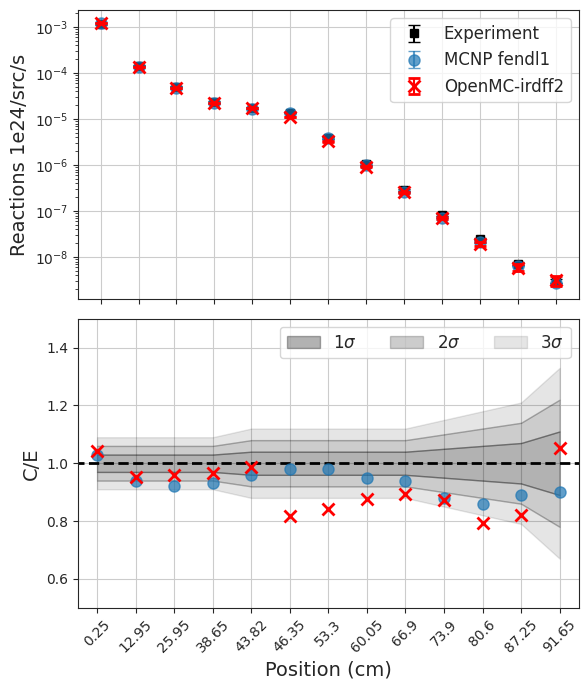

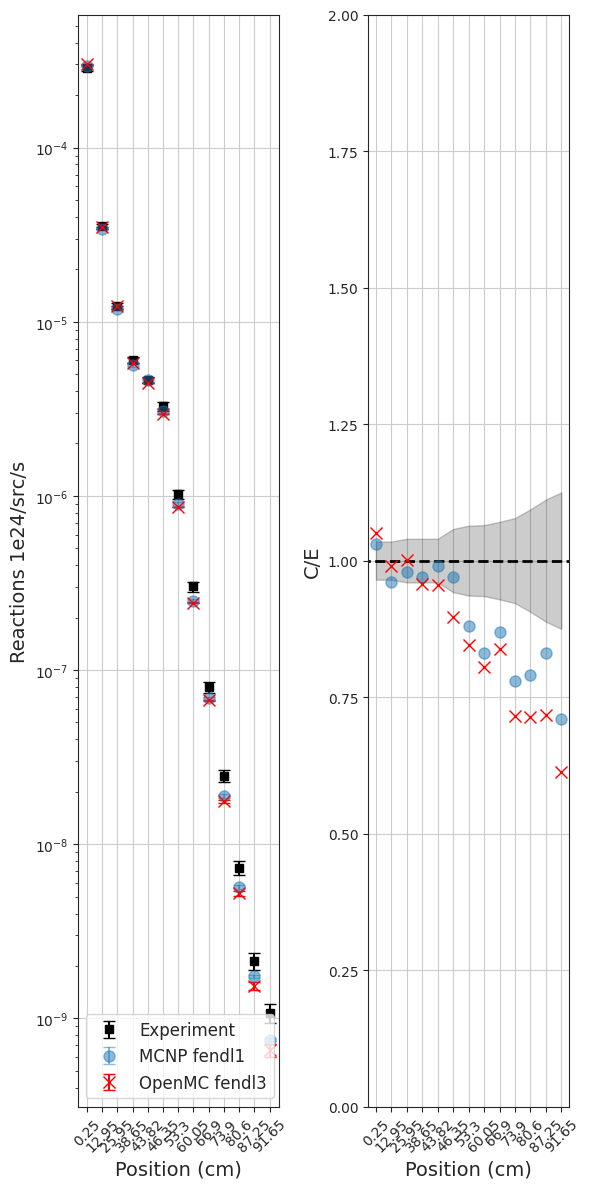

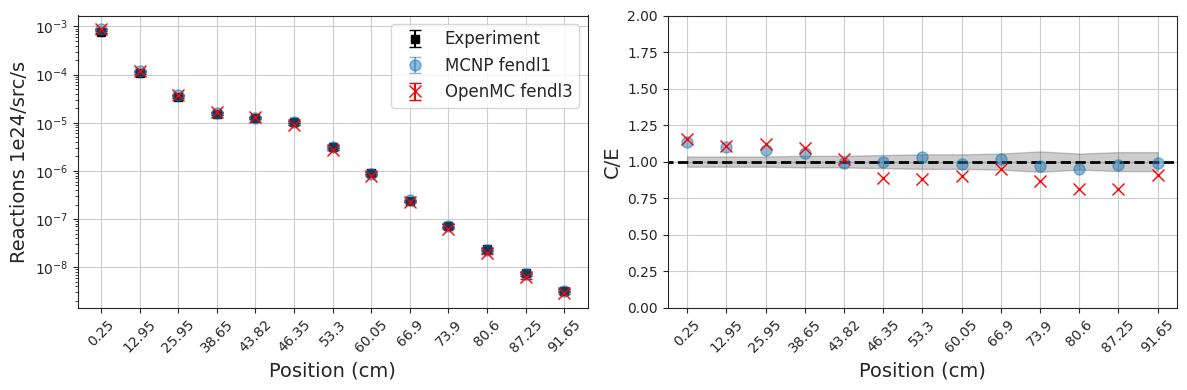

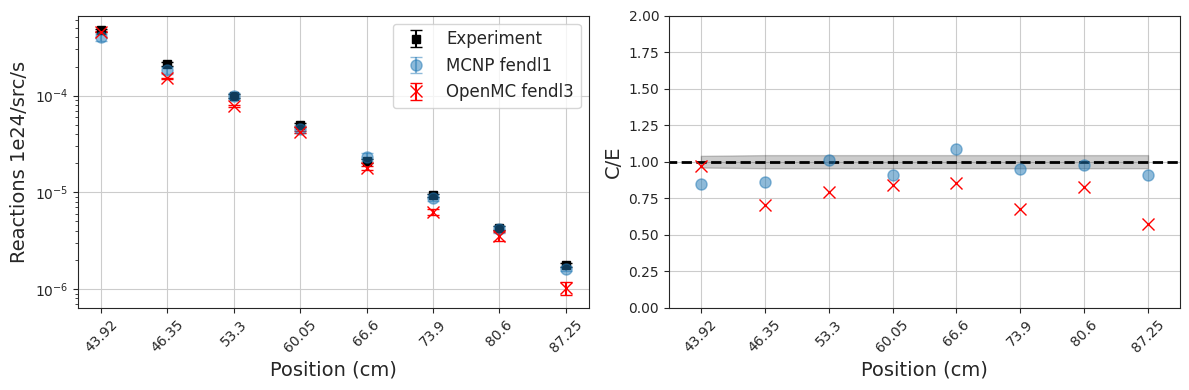

In [14]:
# Tables 5 and 9 results

# Nb93(n,2n)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,7))
ax1.errorbar(np.arange(len(tab5_measured_nb)), tab5_measured_nb['E'], tab5_measured_nb['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab9_computed_nb)), tab9_computed_nb['C FENDL-1'], tab9_computed_nb['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.7, color='tab:blue', label='MCNP fendl1')
# ax1.errorbar(np.arange(len(omc_tab9_nb)), omc_tab9_nb['mean']*tab9_nb_coeff, omc_tab9_nb['std. dev.']*tab9_nb_coeff, marker='s', ms=6, ls='none', capsize=4, color='red', alpha=.2, label='OpenMC fendl3')
ax1.errorbar(np.arange(len(omc_tab9_nb)), omc_tab9_nb_new['mean']*tab9_nb_coeff_new, np.array(omc_tab9_nb_new['std. dev.'])*tab9_nb_coeff_new, marker='x', ms=8, mew=2, ls='none', capsize=4, color='red', zorder=4, label='OpenMC-irdff2')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab9_computed_al)))
# ax1.set_xticklabels(tab9_computed_al['y(cm)'])
ax1.tick_params(axis='x', labelbottom=False)
ax1.legend(frameon=True, fontsize=12)
# ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab5_measured_nb['E'])), 1 + 2*tab5_measured_nb['Error on E']/tab5_measured_nb['E'], 1 + 3*tab5_measured_nb['Error on E']/tab5_measured_nb['E'], color='k', alpha=0.10, label='_nolegend_')
ax2.fill_between(np.arange(len(tab5_measured_nb['E'])), 1 + tab5_measured_nb['Error on E']/tab5_measured_nb['E'], 1 + 2*tab5_measured_nb['Error on E']/tab5_measured_nb['E'], color='k', alpha=0.20, label='_nolegend_')
ax2.fill_between(np.arange(len(tab5_measured_nb['E'])), 1 - tab5_measured_nb['Error on E']/tab5_measured_nb['E'], 1 + tab5_measured_nb['Error on E']/tab5_measured_nb['E'], color='k', alpha=0.30, label='$1\sigma$')
ax2.fill_between(np.arange(len(tab5_measured_nb['E'])), 1 - 2*tab5_measured_nb['Error on E']/tab5_measured_nb['E'], 1 - tab5_measured_nb['Error on E']/tab5_measured_nb['E'], color='k', alpha=0.20, label='$2\sigma$')
ax2.fill_between(np.arange(len(tab5_measured_nb['E'])), 1 - 3*tab5_measured_nb['Error on E']/tab5_measured_nb['E'], 1 - 2*tab5_measured_nb['Error on E']/tab5_measured_nb['E'], color='k', alpha=0.10, label='$3\sigma$')
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2, label='_nolegend_')
ax2.plot(np.arange(len(tab9_computed_nb)), tab9_computed_nb['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.7, color='tab:blue', label='_nolegend_')
# ax2.plot(np.arange(len(omc_tab9_nb)), np.array(omc_tab9_nb['mean'])/np.array(tab5_measured_nb['E'])*tab9_nb_coeff, marker='s', ms=6, ls='none', color='red', alpha=.2, label='OpenMC fendl3')
ax2.plot(np.arange(len(omc_tab9_nb)), np.array(omc_tab9_nb_new['mean'])/np.array(tab5_measured_nb['E'])*tab9_nb_coeff_new, marker='x', ms=8, mew=2, ls='none', color='red', label='_nolegend_')
ax2.set_xlim([-0.5, 12.5])
ax2.set_ylim([0.5, 1.5])
ax2.set_xticks(np.arange(len(tab9_computed_nb)))
ax2.set_xticklabels(tab9_computed_nb['y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.legend(frameon=True, ncol=3, fontsize=12)
ax2.grid()
plt.tight_layout()
# plt.savefig("nb_tab9.png", format="png")

# Al27(n,a)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6,12))
ax1.errorbar(np.arange(len(tab5_measured_al)), tab5_measured_al['E'], tab5_measured_al['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab9_computed_al)), tab9_computed_al['C FENDL-1'], tab9_computed_al['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab9_al)), omc_tab9_al['mean']*tab9_al_coeff, omc_tab9_al['std. dev.']*tab9_al_coeff, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab9_computed_al)))
ax1.set_xticklabels(tab9_computed_al['y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab5_measured_al['E'])), 1 - tab5_measured_al['Error on E']/tab5_measured_al['E'], 1 + tab5_measured_al['Error on E']/tab5_measured_al['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
ax2.plot(np.arange(len(tab9_computed_al)), tab9_computed_al['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab9_al)), np.array(omc_tab9_al['mean'])/np.array(tab5_measured_al['E'])*tab9_al_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 12.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab9_computed_al)))
ax2.set_xticklabels(tab9_computed_al['y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("al_tab9.png", format="png")

#  Ni58(n,p)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab5_measured_ni)), tab5_measured_ni['E'], tab5_measured_ni['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab9_computed_ni)), tab9_computed_ni['C FENDL-1'], tab9_computed_ni['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab9_ni)), omc_tab9_ni['mean']*tab9_ni_coeff, omc_tab9_ni['std. dev.']*tab9_ni_coeff, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab9_computed_ni)))
ax1.set_xticklabels(tab9_computed_ni['y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab5_measured_ni['E'])), 1 - tab5_measured_ni['Error on E']/tab5_measured_ni['E'], 1 + tab5_measured_ni['Error on E']/tab5_measured_ni['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
ax2.plot(np.arange(len(tab9_computed_ni)),mcnp_ce_ni, marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab9_ni)), np.array(omc_tab9_ni['mean'])/np.array(tab5_measured_ni['E'])*tab9_ni_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 12.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab9_computed_ni)))
ax2.set_xticklabels(tab9_computed_ni['y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("ni_tab9.png", format="png")

#  Au197(n,gamma)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab5_measured_au)), tab5_measured_au['E'], tab5_measured_au['Error on E'], marker='s', ms=6, capsize=4, ls='none', color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab9_computed_au)), tab9_computed_au['C FENDL-1'], tab9_computed_au['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab9_au)), omc_tab9_au['mean']*tab9_au_coeff, omc_tab9_au['std. dev.']*tab9_au_coeff, marker='x', ms=8, capsize=4, ls='none', color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab9_computed_au)))
ax1.set_xticklabels(tab9_computed_au['y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab5_measured_au['E'])), 1 - tab5_measured_au['Error on E']/tab5_measured_au['E'], 1 + tab5_measured_au['Error on E']/tab5_measured_au['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
CoE_mcnp = plt.plot(np.arange(len(tab9_computed_au)), tab9_computed_au['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab9_au)), np.array(omc_tab9_au['mean'])/np.array(tab5_measured_au['E'])*tab9_au_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 7.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab9_computed_au)))
ax2.set_xticklabels(tab9_computed_au['y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("au_tab9.png", format="png")

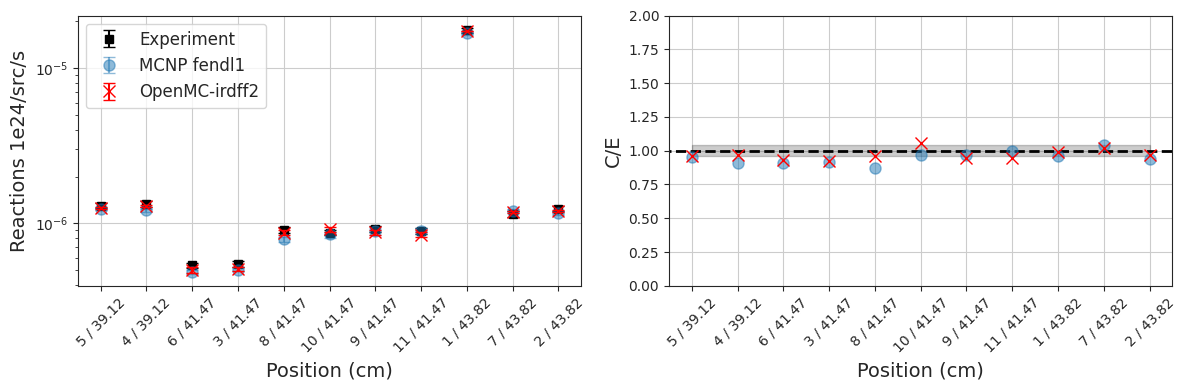

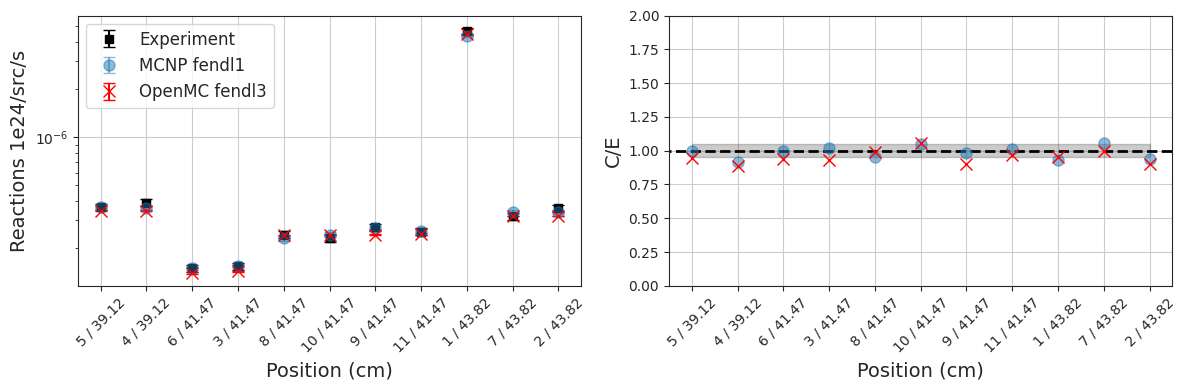

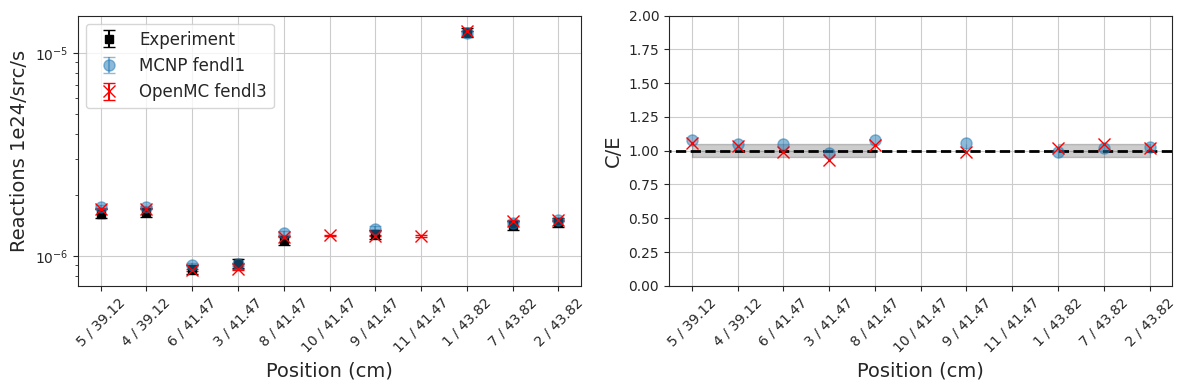

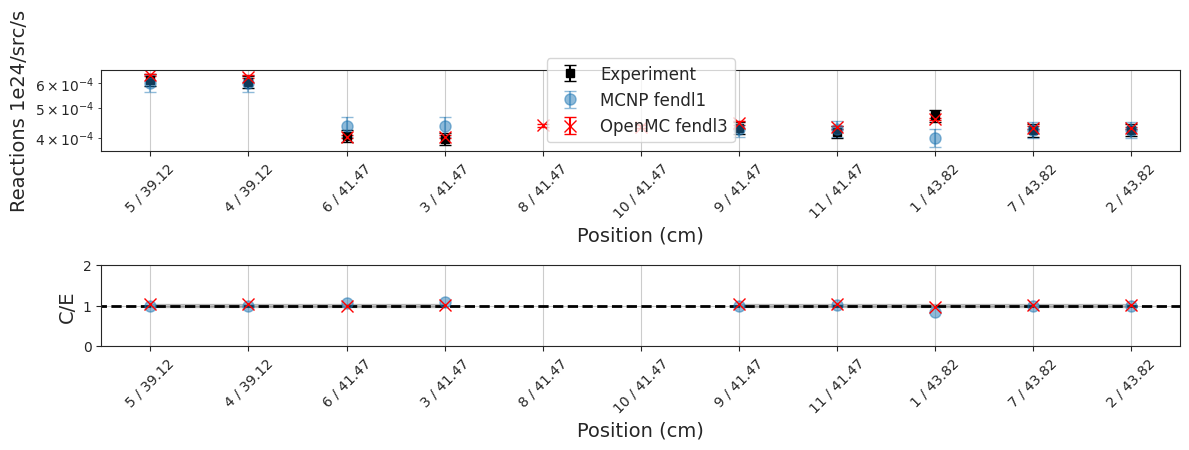

In [15]:
# Tables 6 and 10 results

# Nb93(n,2n)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab6_measured_nb)), tab6_measured_nb['E'], tab6_measured_nb['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab10_computed_nb)), tab10_computed_nb['C FENDL-1'], tab10_computed_nb['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
# ax1.errorbar(np.arange(len(omc_tab10_nb)), omc_tab10_nb['mean']*tab10_nb_coeff, omc_tab10_nb['std. dev.']*tab10_nb_coeff, marker='s', ms=6, ls='none', capsize=4, color='red', alpha=.2, label='OpenMC fendl3')
ax1.errorbar(np.arange(len(omc_tab10_nb)), omc_tab10_nb_new['mean']*tab10_nb_coeff_new, np.array(omc_tab10_nb_new['std. dev.'])*tab10_nb_coeff_new, marker='x', ms=8, ls='none', capsize=4, color='red', zorder=4, label='OpenMC-irdff2')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab10_computed_nb)))
ax1.set_xticklabels(tab10_computed_nb['Position/y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab6_measured_nb['E'])), 1 - tab6_measured_nb['Error on E']/tab6_measured_nb['E'], 1 + tab6_measured_nb['Error on E']/tab6_measured_nb['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
ax2.plot(np.arange(len(tab10_computed_nb)), tab10_computed_nb['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
# ax2.plot(np.arange(len(omc_tab10_nb)), np.array(omc_tab10_nb['mean'])/np.array(tab6_measured_nb['E'])*tab10_nb_coeff, marker='s', ms=6, ls='none', color='red', alpha=.2, label='OpenMC fendl3')
ax2.plot(np.arange(len(omc_tab10_nb)), np.array(omc_tab10_nb_new['mean'])/np.array(tab6_measured_nb['E'])*tab10_nb_coeff_new, marker='x', ms=8, ls='none', color='red', label='OpenMC-irdff2')
ax2.set_xlim([-0.5, 10.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab10_computed_nb)))
ax2.set_xticklabels(tab10_computed_nb['Position/y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_ylabel('C/E', fontsize=14)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("nb_tab10.png", format="png")

# Al27(n,a)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab6_measured_al)), tab6_measured_al['E'], tab6_measured_al['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab10_computed_al)), tab10_computed_al['C FENDL-1'], tab10_computed_al['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab10_al)), omc_tab10_al['mean']*tab10_al_coeff, omc_tab10_al['std. dev.']*tab10_al_coeff, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab10_computed_al)))
ax1.set_xticklabels(tab10_computed_al['Position/y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab6_measured_al['E'])), 1 - tab6_measured_al['Error on E']/tab6_measured_al['E'], 1 + tab6_measured_al['Error on E']/tab6_measured_al['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
ax2.plot(np.arange(len(tab10_computed_al)), tab10_computed_al['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab10_al)), np.array(omc_tab10_al['mean'])/np.array(tab6_measured_al['E'])*tab10_al_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 10.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab10_computed_al)))
ax2.set_xticklabels(tab10_computed_al['Position/y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("al_tab10.png", format="png")

#  Ni58(n,p)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab6_measured_ni)), tab6_measured_ni['E'], tab6_measured_ni['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab10_computed_ni)), tab10_computed_ni['C FENDL-1'], tab10_computed_ni['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab10_ni)), omc_tab10_ni['mean']*tab10_ni_coeff, omc_tab10_ni['std. dev.']*tab10_ni_coeff, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab10_computed_ni)))
ax1.set_xticklabels(tab10_computed_ni['Position/y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab6_measured_ni['E'])), 1 - tab6_measured_ni['Error on E']/tab6_measured_ni['E'], 1 + tab6_measured_ni['Error on E']/tab6_measured_ni['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
ax2.plot(np.arange(len(tab10_computed_ni)), tab10_computed_ni['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab10_ni)), np.array(omc_tab10_ni['mean'])/np.array(tab6_measured_ni['E'])*tab10_ni_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 10.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab10_computed_ni)))
ax2.set_xticklabels(tab10_computed_ni['Position/y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("ni_tab10.png", format="png")

#  Au197(n,gamma)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,4))
ax1.errorbar(np.arange(len(tab6_measured_au)), tab6_measured_au['E'], tab6_measured_au['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab10_computed_au)), tab10_computed_au['C FENDL-1'], tab10_computed_au['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab10_au)), omc_tab10_au['mean']*tab10_au_coeff, omc_tab10_au['std. dev.']*tab10_au_coeff, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab10_computed_au)))
ax1.set_xticklabels(tab10_computed_au['Position/y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab6_measured_au['E'])), 1 - tab6_measured_au['Error on E']/tab6_measured_au['E'], 1 + tab6_measured_au['Error on E']/tab6_measured_au['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
CoE_mcnp = plt.plot(np.arange(len(tab10_computed_au)), tab10_computed_au['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab10_au)), np.array(omc_tab10_au['mean'])/np.array(tab6_measured_au['E'])*tab10_au_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 10.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab10_computed_au)))
ax2.set_xticklabels(tab10_computed_au['Position/y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("au_tab10.png", format="png")

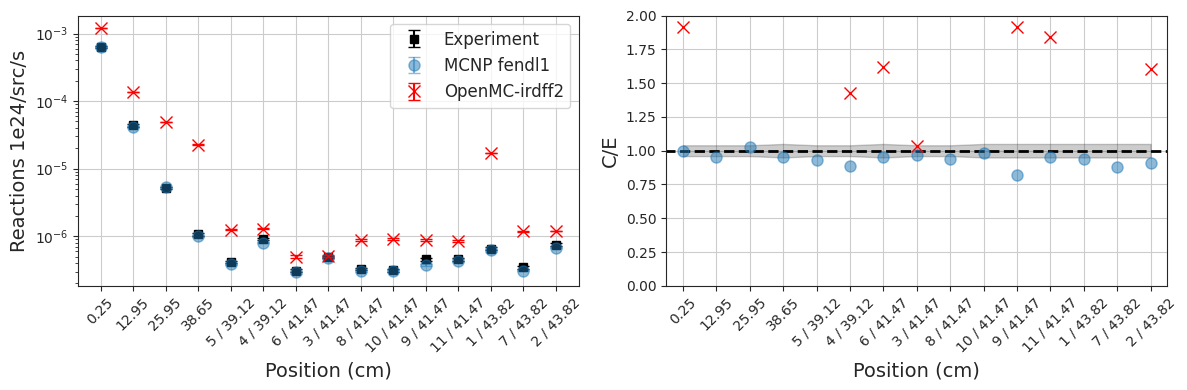

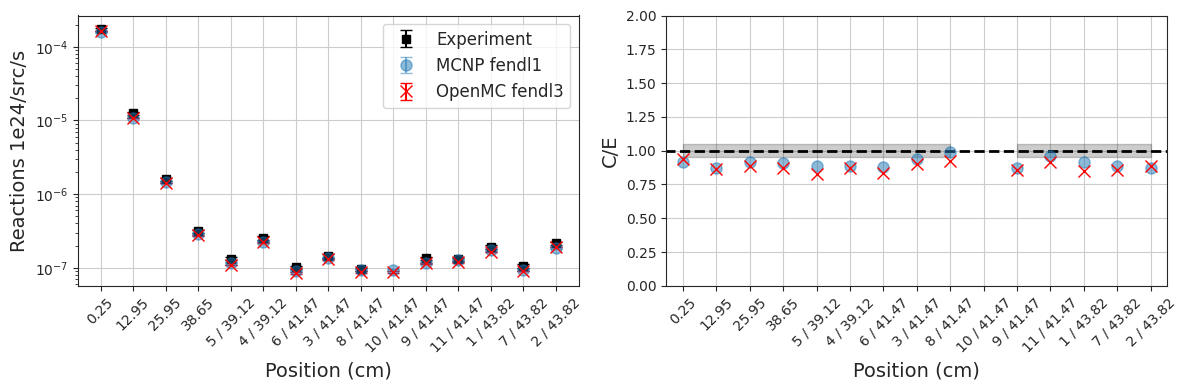

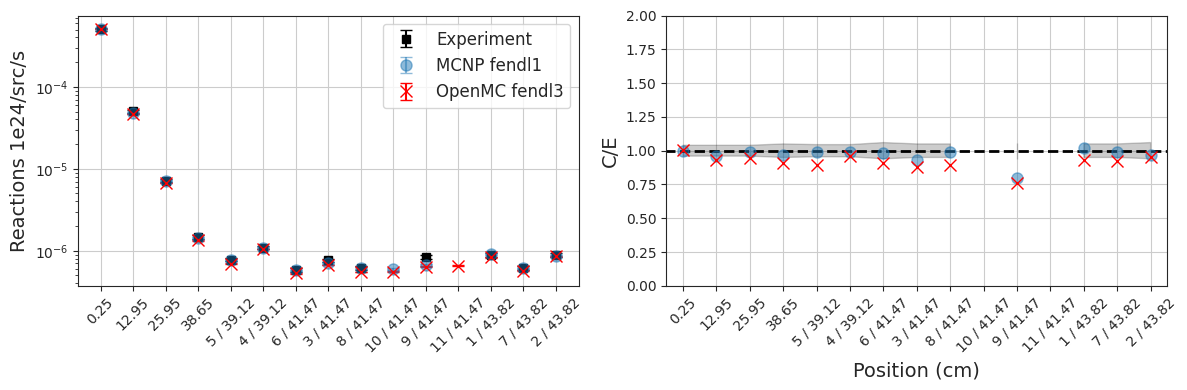

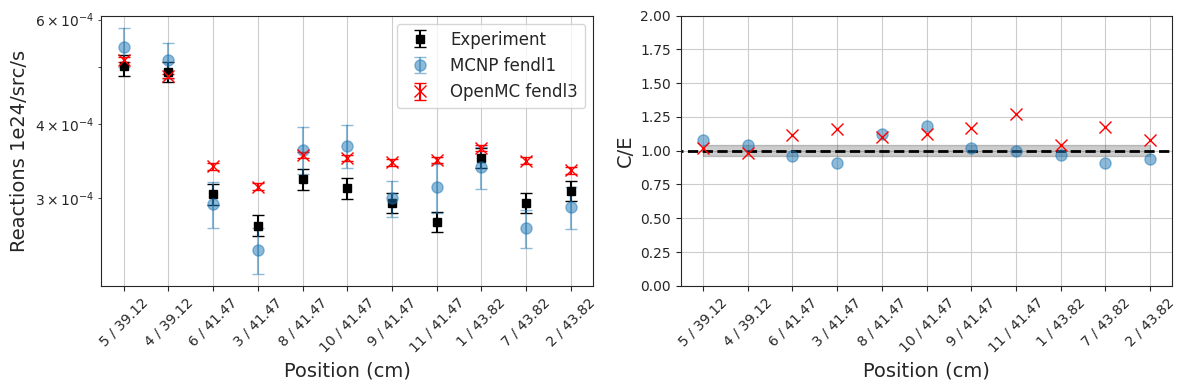

In [16]:
# Tables 7 and 11 results -  OFF-AXIS source

# Nb93(n,2n)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab7_measured_nb)), tab7_measured_nb['E'], tab7_measured_nb['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab11_computed_nb)), tab11_computed_nb['C FENDL-1'], tab11_computed_nb['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
# ax1.errorbar(np.arange(len(omc_tab11_nb)), omc_tab11_nb['mean']*tab11_nb_coeff, omc_tab11_nb['std. dev.']*tab11_nb_coeff, marker='s', ms=6, ls='none', capsize=4, color='red', alpha=.2, label='OpenMC fendl3')
ax1.errorbar(np.arange(len(omc_tab11_nb)), omc_tab11_nb_new['mean']*tab11_nb_coeff_new, np.array(omc_tab11_nb_new['std. dev.'])*tab11_nb_coeff_new, marker='x', ms=8, ls='none', capsize=4, color='red', zorder=4, label='OpenMC-irdff2')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab11_computed_nb)))
ax1.set_xticklabels(tab11_computed_nb['Position/y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab7_measured_nb['E'])), 1 - tab7_measured_nb['Error on E']/tab7_measured_nb['E'], 1 + tab7_measured_nb['Error on E']/tab7_measured_nb['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
ax2.plot(np.arange(len(tab11_computed_nb)), tab11_computed_nb['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
# ax2.plot(np.arange(len(omc_tab11_nb)), np.array(omc_tab11_nb['mean'])/np.array(tab7_measured_nb['E'])*tab11_nb_coeff, marker='s', ms=6, ls='none', color='red', alpha=.2, label='OpenMC fendl3')
ax2.plot(np.arange(len(omc_tab11_nb)), np.array(omc_tab11_nb_new['mean'])/np.array(tab7_measured_nb['E'])*tab11_nb_coeff_new, marker='x', ms=8, ls='none', color='red', label='OpenMC-irdff2')
ax2.set_xlim([-0.5, 14.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab11_computed_nb)))
ax2.set_xticklabels(tab11_computed_nb['Position/y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("nb_tab11.png", format="png")

# Al27(n,a)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab7_measured_al)), tab7_measured_al['E'], tab7_measured_al['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab11_computed_al)), tab11_computed_al['C FENDL-1'], tab11_computed_al['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab11_al)), omc_tab11_al['mean']*tab11_al_coeff, omc_tab11_al['std. dev.']*tab11_al_coeff, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab11_computed_al)))
ax1.set_xticklabels(tab11_computed_al['Position/y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab7_measured_al['E'])), 1 - tab7_measured_al['Error on E']/tab7_measured_al['E'], 1 + tab7_measured_al['Error on E']/tab7_measured_al['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
ax2.plot(np.arange(len(tab11_computed_al)), tab11_computed_al['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab11_al)), np.array(omc_tab11_al['mean'])/np.array(tab7_measured_al['E'])*tab11_al_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 14.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab11_computed_al)))
ax2.set_xticklabels(tab11_computed_al['Position/y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("al_tab11.png", format="png")

#  Ni58(n,p)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab7_measured_ni)), tab7_measured_ni['E'], tab7_measured_ni['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab11_computed_ni)), tab11_computed_ni['C FENDL-1'], tab11_computed_ni['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab11_ni)), omc_tab11_ni['mean']*tab11_ni_coeff, omc_tab11_ni['std. dev.']*tab11_ni_coeff, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab11_computed_ni)))
ax1.set_xticklabels(tab11_computed_ni['Position/y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab7_measured_ni['E'])), 1 - tab7_measured_ni['Error on E']/tab7_measured_ni['E'], 1 + tab7_measured_ni['Error on E']/tab7_measured_ni['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
ax2.plot(np.arange(len(tab11_computed_ni)), tab11_computed_ni['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab11_ni)), np.array(omc_tab11_ni['mean'])/np.array(tab7_measured_ni['E'])*tab11_ni_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 14.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab11_computed_ni)))
ax2.set_xticklabels(tab11_computed_ni['Position/y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("ni_tab11.png", format="png")

#  Au197(n,gamma)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(tab7_measured_au)), tab7_measured_au['E'], tab7_measured_au['Error on E'], marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
ax1.errorbar(np.arange(len(tab11_computed_au)), tab11_computed_au['C FENDL-1'], tab11_computed_au['FENDL-1 err'], marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl1')
ax1.errorbar(np.arange(len(omc_tab11_au)), omc_tab11_au['mean']*tab11_au_coeff, omc_tab11_au['std. dev.']*tab11_au_coeff, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tab10_computed_au)))
ax1.set_xticklabels(tab10_computed_au['Position/y(cm)'])
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend(frameon=True, fontsize=12)
ax1.set_xlabel('Position (cm)', fontsize=14)
ax1.set_ylabel('Reactions 1e24/src/s', fontsize=14)
ax1.grid()
#
ax2.fill_between(np.arange(len(tab7_measured_au['E'])), 1 - tab7_measured_au['Error on E']/tab7_measured_au['E'], 1 + tab7_measured_au['Error on E']/tab7_measured_au['E'], color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
CoE_mcnp = plt.plot(np.arange(len(tab11_computed_au)), tab11_computed_au['C/E FEN-1'], marker='o', ms=8, ls='none', alpha=.5, color='tab:blue', label='MCNP fendl1')
ax2.plot(np.arange(len(omc_tab11_au)), np.array(omc_tab11_au['mean'])/np.array(tab7_measured_au['E'])*tab11_au_coeff, marker='x', ms=8, ls='none', color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 10.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(tab11_computed_au)))
ax2.set_xticklabels(tab11_computed_au['Position/y(cm)'])
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_xlabel('Position (cm)', fontsize=14)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("au_tab11.png", format="png")

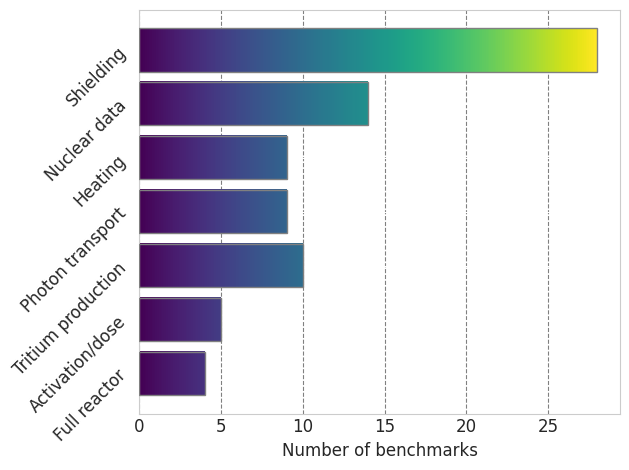

In [17]:
count = [28, 14, 9, 9, 10, 5, 4]
heads = ['Shielding', 'Nuclear data', 'Heating', 'Photon transport', 'Tritium production', 'Activation/dose', 'Full reactor']

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import colors as mcolors, path

def gradientbars(bars, ydata):
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    grad = np.atleast_2d(np.linspace(0,1,256))
    for bar in bars:
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0,1*w/max(ydata),256))
        ax.imshow(grad, extent=[x, x+w, y, y+h], aspect='auto', zorder=2, norm=cm.colors.NoNorm(vmin=0,vmax=1), cmap='viridis')
    ax.axis(lim)

fig, ax = plt.subplots()
# zorder=0 sends gridlines to the back
ax.grid(which='major', axis='x', linestyle='--', color='gray', zorder=0)
ax.grid(which='major', axis='y', linestyle='-', color="white", zorder=0)
# zorder=3 makes our edges show
my_bar = ax.barh(heads, np.flip(count), edgecolor='gray', zorder=3)
gradientbars(my_bar, count)
ax.set_yticks(np.arange(len(heads)))
ax.set_yticklabels(np.flip(heads))
ax.set_xlabel('Number of benchmarks', fontsize=12)
ax.tick_params(axis='x', which='both', direction='in', labelsize=12)
ax.tick_params(axis='y', labelrotation =45, labelsize=12)
plt.tight_layout()
# plt.savefig('n_benchmarks.png', format='png', dpi=600)

In [18]:
heating_sp = openmc.StatePoint('statepoint_heating20b.100.h5')

In [19]:
heating = heating_sp.get_tally(name='heating_dose').get_pandas_dataframe()

In [20]:
cells = [239, 262, 285, 308, 331, 363, 386, 398, 500, 507, 514, 521]
ev2gy = 1.60217733e-16
omc_fendl3_qn = []
omc_fendl3_qp = []
for c in cells:
    c_heating = heating.loc[heating['cell'] == c]

    if c in (239, 262, 285, 308):
        vol = 1.8**2 * np.pi/4 * .1 * 2
    elif c in (331, 363, 386, 398):
        vol = 1.8**2 * np.pi/4 * .1 * 3
    elif c in (500, 507, 514, 521):
        vol = 4/3 * np.pi * .8**3
    
    if c in (507, 521):
        dens = 8.94  # g/cm3 - copper
    else:
        dens = 7.89  # g/cm3 - aisi361

    c_heating_mean = np.array(c_heating['mean']) /vol/dens*ev2gy
    n_heating_mean = c_heating_mean[0]
    p_heating_mean = sum(c_heating_mean[1:])

    c_heating_stddev = np.array(c_heating['std. dev.']) /vol/dens*ev2gy
    n_heating_stddev = c_heating_stddev[0]
    p_heating_stddev = sum(c_heating_stddev[1:])

    omc_fendl3_qn.append([n_heating_mean, n_heating_stddev])
    omc_fendl3_qp.append([p_heating_mean, p_heating_stddev])

omc_fendl3_qn = np.array(omc_fendl3_qn).T.reshape(2,12)
omc_fendl3_qp = np.array(omc_fendl3_qp).T.reshape(2,12)

In [21]:

heat_pos = ['46.35/SS','53.3/SS','60.05/SS','66.9/SS','73.9/SS','80.6/SS','87.25/SS','91.65/SS','95.36/SS','97.56/Cu','99.76/SS','101.96/Cu']

exp_heating = np.array([2.37E-16, 7.79E-17, 2.67E-17, 8.77E-18, 3.29E-18, 1.42E-18, 5.32E-19, 2.53E-19, 1.06e-19, 6.77e-20, 4.13e-20, 2.67e-20])
exp_heat_stddev = np.array([10,10,10,10,10,10,10,10,11,18,27,35]) / 100

ce = np.array([.1, .07, .05, .05, .05, .05, .05, .05, .05, .05, .05, .05])
cn = np.array([2.7, 2.78, 2.9, 3., 3.09, 3.19, 3.29, 3.39, 3.50, 4.45, 3.65, 5.12])
cp = np.ones(8)
cp = np.concatenate([cp, [1, 1.05, 1, 1.05]])

mcnp_eff3_qn = np.array([1.25E-16, 3.54E-17, 9.94E-18, 2.75E-18, 7.45E-19, 2.29E-19, 7.15E-20, 3.20E-20, 1.58e-20, 2.78e-20, 7.36e-21, 1.66e-21])
mcnp_eff3_qp = np.array([2.35E-16, 7.84E-17, 2.82E-17, 9.82E-18, 3.65E-18, 1.46E-18, 5.33E-19, 2.09E-19, 9.02e-20, 6.08e-20, 4.08e-20, 2.98e-20])

mcnp_fendl2_qn = np.array([1.42E-16, 4.05E-17, 1.15E-17, 3.18E-18, 8.77E-19, 2.66E-19, 8.19E-20, 3.65E-20, 1.76E-20, 2.78E-21, 8.03E-21, 1.66E-21])
mcnp_fendl2_qp = np.array([2.06E-16, 7.17E-17, 2.64E-17, 9.55E-18, 3.42E-18, 1.35E-18, 5.01E-19, 1.82E-19, 8.96E-20, 5.81E-20, 3.86E-20, 2.77E-20])


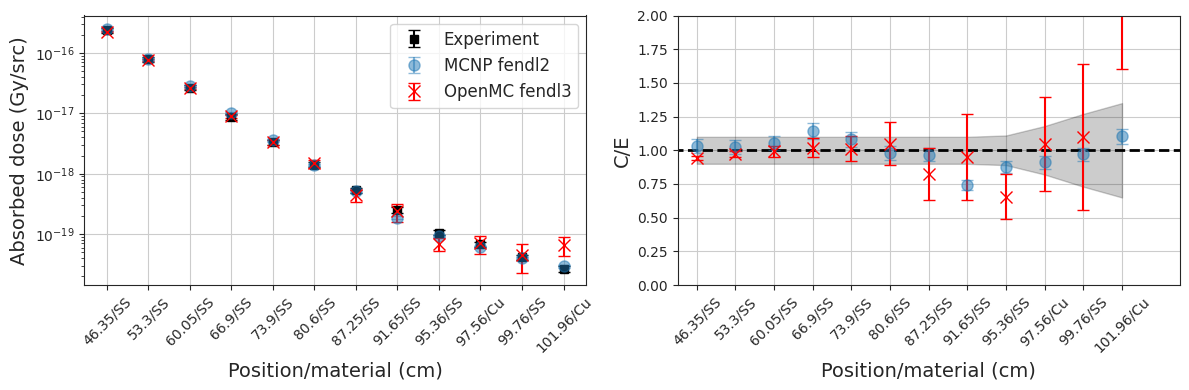

In [22]:
sns.set_style("ticks")

mcnp_eff3_qtld = (mcnp_eff3_qn * cn * ce + mcnp_eff3_qp * cp)
mcnp_fendl2_qtld = (mcnp_fendl2_qn * cn * ce + mcnp_fendl2_qp * cp)
omc_fendl3_qtld = [omc_fendl3_qn[i] * cn * ce + qp * cp for i,qp in enumerate(omc_fendl3_qp)]

## conceptually wrong errobar for the C/E
omc_ce = omc_fendl3_qtld[0] / exp_heating
omc_ce_stddev = omc_fendl3_qtld[1] / omc_fendl3_qtld[0] * omc_ce
##

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.errorbar(np.arange(len(exp_heating)), exp_heating, exp_heating * .1, marker='s', ms=6, ls='none', capsize=4, color='k', label='Experiment')
# ax1.plot(np.arange(len(mcnp_eff3_qtld)), mcnp_eff3_qtld, marker='s', ms=6, ls='none', color='tab:green', label='MCNP eff3')
ax1.errorbar(np.arange(len(mcnp_fendl2_qtld)), mcnp_fendl2_qtld, mcnp_fendl2_qtld*.05, marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl2')
ax1.errorbar(np.arange(len(omc_fendl3_qtld[0])), omc_fendl3_qtld[0], omc_fendl3_qtld[1], marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(exp_heating)))
ax1.set_xticklabels(heat_pos)
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_xlabel('Position/material (cm)', fontsize=14)
ax1.set_ylabel('Absorbed dose (Gy/src)', fontsize=14)
ax1.legend(frameon=True, fontsize=12)
ax1.grid()
#
ax2.fill_between(np.arange(len(exp_heat_stddev)), 1 - exp_heat_stddev, 1 + exp_heat_stddev, color='k', alpha=0.2)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='--', linewidth=2)
# ax2.plot(np.arange(len(mcnp_eff3_qtld)), mcnp_eff3_qtld / exp_heating, marker='s', ms=6, ls='none', color='tab:green', label='MCNP eff3')
ax2.errorbar(np.arange(len(mcnp_fendl2_qtld)), mcnp_fendl2_qtld / exp_heating, mcnp_fendl2_qtld/exp_heating*.05, marker='o', ms=8, ls='none', capsize=4, alpha=.5, color='tab:blue', label='MCNP fendl2')
ax2.errorbar(np.arange(len(omc_fendl3_qtld[0])), omc_fendl3_qtld[0] / exp_heating, omc_ce_stddev, marker='x', ms=8, ls='none', capsize=4, color='red', label='OpenMC fendl3')
ax2.set_xlim([-0.5, 12.5])
ax2.set_ylim([0, 2])
ax2.set_xticks(np.arange(len(exp_heating)))
ax2.set_xticklabels(heat_pos)
ax2.set_xlabel('Position/material (cm)', fontsize=14)
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_ylabel('C/E', fontsize=14)
ax2.grid()
plt.tight_layout()
# plt.savefig("heating.png", format="png")

In [23]:
# m999 - CaF2 nuclear heating dosimeter TLD-300
caf2 = openmc.Material(material_id=999, name='caf2')
caf2.add_element('Ca', 1.0, 'ao')
caf2.add_element('F', 2.0, 'ao')
caf2.set_density('g/cm3', 3.18)

sum(caf2.get_nuclide_atom_densities().values())

/home/segantin/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=999.
  warn(msg, IDWarning)


0.07358482076539949

In [24]:
# tab9_computed_nb.to_csv('prova.csv', index=False)




In [25]:
measured = [tab5_measured_nb,
tab5_measured_al,
tab5_measured_ni,
tab5_measured_au,
tab6_measured_nb,
tab6_measured_al,
tab6_measured_ni,
tab6_measured_au,
tab7_measured_nb,
tab7_measured_al,
tab7_measured_ni,
tab7_measured_au]

mcnp = [tab9_computed_nb,
tab9_computed_al,
tab9_computed_ni,
tab9_computed_au,
tab10_computed_nb,
tab10_computed_al,
tab10_computed_ni,
tab10_computed_au,
tab11_computed_nb,
tab11_computed_al,
tab11_computed_ni,
tab11_computed_au]

tables = ['tab1', 'tab1', 'tab1', 'tab1', 'tab2', 'tab2', 'tab2', 'tab2', 'tab3', 'tab3', 'tab3', 'tab3']

nuclides = ['nb', 'al', 'ni', 'au', 'nb', 'al', 'ni', 'au', 'nb', 'al', 'ni', 'au']

for i, el in enumerate(tables):

    name_measured = el + '_measured_' + nuclides[i] + '.csv'
    name_mcnp = el + '_mcnp_' + nuclides[i] + '.csv'

    # measured[i].to_csv(name_measured, index=False)
    # mcnp[i].to_csv(name_mcnp, index=False)




0     3.510000e-05
1     4.350000e-06
2     1.515000e-06
3     7.080000e-07
4     7.000000e-07
5     5.560000e-07
6     1.556000e-07
7     4.200000e-08
8     1.140000e-08
9     4.100000e-09
10    1.476000e-09
11    5.068000e-10
12    3.322000e-10
Name: Error on E, dtype: float64
0     1.004500e-05
1     1.239000e-06
2     4.920000e-07
3     2.424000e-07
4     1.860000e-07
5     1.902400e-07
6     6.528000e-08
7     1.963000e-08
8     5.665800e-09
9     1.918800e-09
10    6.871400e-10
11    2.396800e-10
12    1.337500e-10
Name: Error on E, dtype: float64
0     2.705500e-05
1     3.745000e-06
2     1.193500e-06
3     6.160000e-07
4     5.080000e-07
5     4.590000e-07
6     1.555000e-07
7     4.450000e-08
8     1.320000e-08
9     5.138000e-09
10    1.298000e-09
11    4.914000e-10
12    2.125500e-10
Name: Error on E, dtype: float64
0    1.888000e-05
1    9.630000e-06
2    4.464000e-06
3    2.245500e-06
4    9.495000e-07
5    4.185000e-07
6    1.912500e-07
7    8.055000e-08
Name: Error on E